# Mini Project - FireAID - Wildfire Prediction ML Project Assignment

## Alex Johnson

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from operator import itemgetter

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans

input_file = "Mini Project Dataset Narrowed.csv"
fireData = pd.DataFrame()
fireData = pd.read_csv(input_file)

## Approach #1
### Linear and Polynomial Regression

In [2]:
label_encoder = LabelEncoder()
fireData["Slope Encode"] =  label_encoder.fit_transform(fireData['ORIGINSLOPE'])
fireData["Aspect Encode"] =  label_encoder.fit_transform(fireData['ORIGINASPECT'])
fireData["Elevation Encode"] =  label_encoder.fit_transform(fireData['ORIGINELEVATION'])


fireData.pop("ORIGINSLOPE")
fireData.pop("ORIGINASPECT")
fireData.pop("ORIGINELEVATION")

X = fireData.loc[:, fireData.columns != 'ESTIMATEDTOTALACRES']
Y = fireData["ESTIMATEDTOTALACRES"]


In [3]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7)


In [4]:
regressor = SGDRegressor()
regressor.fit(X_train, Y_train)
Y_pred = regressor.predict(X_test)

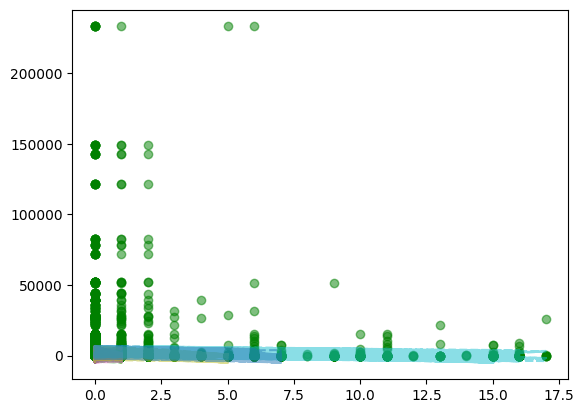

Mean Absolute Error: 3801.7310267569974
Mean Squared Error: 170081824.87178406
Root Mean Squared Error: 13041.542273511368


In [5]:
X_test.shape, Y_pred.shape, Y_test.shape

plt.clf()
plt.plot(X_test, Y_test, 'go', label='True data', alpha=0.5)
plt.plot(X_test, Y_pred, '--', label='Predictions', alpha=0.5)
#plt.legend(loc='best')
plt.show()
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

### Polynomial Regressions

In [6]:
degree1=2
degree2=4
polyreg_fit1 = make_pipeline(PolynomialFeatures(degree1), SGDRegressor(alpha = .00001, max_iter=500))
polyreg_fit2 = make_pipeline(PolynomialFeatures(degree2), SGDRegressor(alpha = .00001, max_iter=500))

In [7]:
polyreg_fit1.fit(X_train, Y_train)
polyreg_fit2.fit(X_train, Y_train)

Y_pred1 = polyreg_fit1.predict(X_test)
Y_pred2 = polyreg_fit2.predict(X_test)

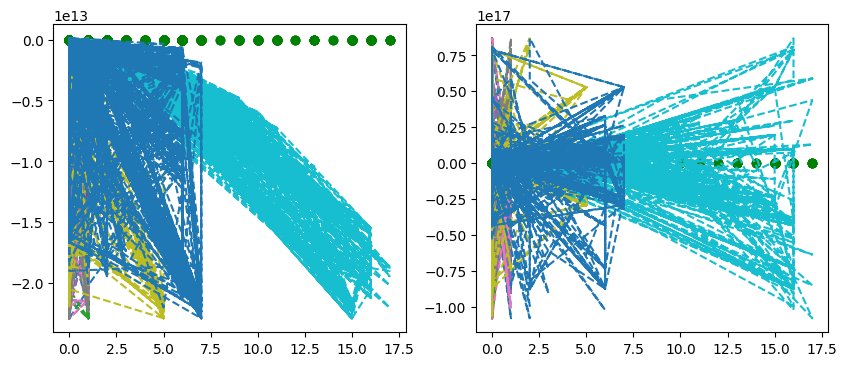

Degree 2:
Mean Absolute Error: 5018255517283.622
Mean Squared Error: 7.423976482470987e+25
Root Mean Squared Error: 8616250044230.951
Degree 4:
Mean Absolute Error: 9250548481262338.0
Mean Squared Error: 4.2639004947519765e+32
Root Mean Squared Error: 2.064921425805829e+16


In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))


axes[0].plot(X_test, Y_test, 'go', label='True data')
axes[0].plot(X_test, Y_pred1, '--', label='Predictions')



axes[1].plot(X_test, Y_test, 'go', label='True data')
axes[1].plot(X_test, Y_pred2, '--', label='Predictions')

plt.show()

print("Degree 2:")
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred1)))

print("Degree 4:")
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred2))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred2)))

## Approach #2
### Linear Regression

In [9]:
input_file = "Mini Project Dataset Narrowed.csv"
fireData = pd.DataFrame()
fireData = pd.read_csv(input_file)

label_encoder = LabelEncoder()
fireData["Slope Encode"] =  label_encoder.fit_transform(fireData['ORIGINSLOPE'])
fireData["Aspect Encode"] =  label_encoder.fit_transform(fireData['ORIGINASPECT'])
fireData["Elevation Encode"] =  label_encoder.fit_transform(fireData['ORIGINELEVATION'])


fireData.pop("ORIGINSLOPE")
fireData.pop("ORIGINASPECT")
fireData.pop("ORIGINELEVATION");


In [10]:
fireData.loc[fireData['ESTIMATEDTOTALACRES'] <=1, 'Size'] = 'Small'
fireData.loc[(fireData['ESTIMATEDTOTALACRES'] > 1) & (fireData['ESTIMATEDTOTALACRES'] <= 500), 'Size'] = 'Medium'
fireData.loc[fireData['ESTIMATEDTOTALACRES'] > 500, 'Size'] = 'Large'

In [11]:
fireData_small = fireData[fireData['Size'] == 'Small']
fireData_medium = fireData[fireData['Size'] == 'Medium']
fireData_large = fireData[fireData['Size'] == 'Large']

In [12]:
Small_train, Small_test = train_test_split(fireData_small, test_size=0.3, random_state=7)
Medium_train, Medium_test = train_test_split(fireData_medium, test_size=0.3, random_state=10)
Large_train, Large_test = train_test_split(fireData_large, test_size=0.3, random_state=44)

training_data = pd.concat([Small_train, Medium_train, Large_train])
test_data = pd.concat([Small_test, Medium_test, Large_test])


In [13]:
X_train = training_data.loc[:, (training_data.columns != 'ESTIMATEDTOTALACRES') & (training_data.columns != 'Size')]
Y_train = training_data["ESTIMATEDTOTALACRES"]

X_test = test_data.loc[:, (test_data.columns != 'ESTIMATEDTOTALACRES') & (test_data.columns != 'Size')]
Y_test = test_data["ESTIMATEDTOTALACRES"]

In [14]:
regressor = SGDRegressor()
regressor.fit(X_train, Y_train)
Y_pred = regressor.predict(X_test)


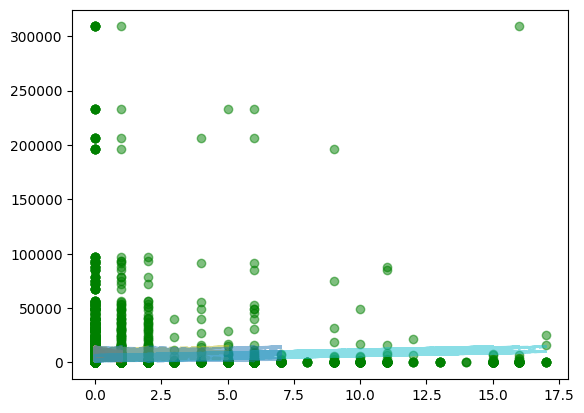

Mean Absolute Error: 7328.19033291358
Mean Squared Error: 267069145.04661107
Root Mean Squared Error: 16342.25030546929


In [15]:
X_test.shape, Y_pred.shape, Y_test.shape

plt.clf()
plt.plot(X_test, Y_test, 'go', label='True data', alpha=0.5)
plt.plot(X_test, Y_pred, '--', label='Predictions', alpha=0.5)
#plt.legend(loc='best')
plt.show()
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

### Polynomial Regressions

In [16]:
degree1=2
degree2=4
polyreg_fit1 = make_pipeline(PolynomialFeatures(degree1), SGDRegressor(alpha = .00001, max_iter=500))
polyreg_fit2 = make_pipeline(PolynomialFeatures(degree2), SGDRegressor(alpha = .00001, max_iter=500))

In [17]:
polyreg_fit1.fit(X_train, Y_train)
polyreg_fit2.fit(X_train, Y_train)

Y_pred1 = polyreg_fit1.predict(X_test)
Y_pred2 = polyreg_fit2.predict(X_test)

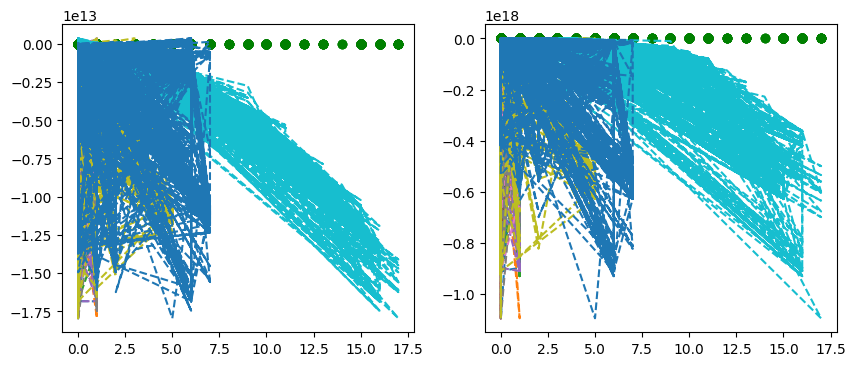

Degree 2:
Mean Absolute Error: 3346656212234.343
Mean Squared Error: 3.201365632526476e+25
Root Mean Squared Error: 5658061180763.669
Degree 4:
Mean Absolute Error: 1.0806632072207504e+17
Mean Squared Error: 5.592336481873477e+34
Root Mean Squared Error: 2.364812145155187e+17


In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))


axes[0].plot(X_test, Y_test, 'go', label='True data')
axes[0].plot(X_test, Y_pred1, '--', label='Predictions')



axes[1].plot(X_test, Y_test, 'go', label='True data')
axes[1].plot(X_test, Y_pred2, '--', label='Predictions')

plt.show()

print("Degree 2:")
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred1)))

print("Degree 4:")
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred2))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred2)))

## Neural Network

In [19]:
mlp_X_train = training_data.loc[:, (training_data.columns != 'ESTIMATEDTOTALACRES') & (training_data.columns != 'Size')]
mlp_Y_train = training_data["Size"]

mlp_X_test = test_data.loc[:, (test_data.columns != 'ESTIMATEDTOTALACRES') & (test_data.columns != 'Size')]
mlp_Y_test = test_data["Size"]

In [20]:
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(mlp_X_train,mlp_Y_train)
y_pred = mlp.predict(mlp_X_test)


In [21]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(mlp_Y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(mlp_Y_test, y_pred, average='weighted'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(mlp_Y_test, y_pred, average='weighted'))

Accuracy: 0.6613876319758673
Precision: 0.5925838878282669
Recall: 0.6613876319758673


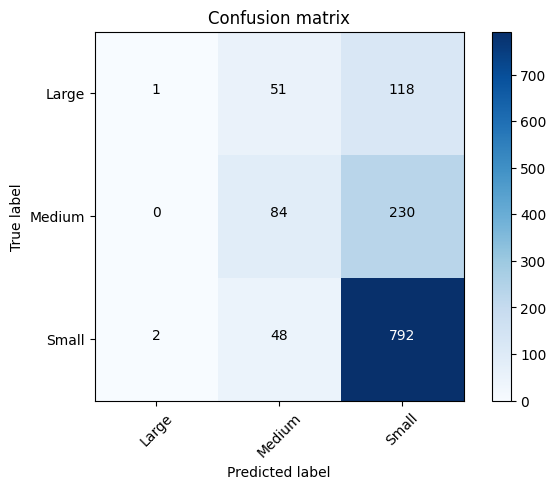

In [22]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm_labels = ["Large", "Medium","Small"]

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm = confusion_matrix(mlp_Y_test, y_pred)

plot_confusion_matrix(cm, cm_labels)  
plt.show()

## Approach #3
### Linear Regression

In [23]:
input_file = "Mini Project Dataset Narrowed.csv"
fireData = pd.DataFrame()
fireData = pd.read_csv(input_file)

label_encoder = LabelEncoder()
fireData["Slope Encode"] =  label_encoder.fit_transform(fireData['ORIGINSLOPE'])
fireData["Aspect Encode"] =  label_encoder.fit_transform(fireData['ORIGINASPECT'])
fireData["Elevation Encode"] =  label_encoder.fit_transform(fireData['ORIGINELEVATION'])


fireData.pop("ORIGINSLOPE")
fireData.pop("ORIGINASPECT")
fireData.pop("ORIGINELEVATION");

X = fireData['ESTIMATEDTOTALACRES'].to_numpy()
X = X.reshape(-1,1)

In [24]:
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)
fireData['cluster'] = y_km

In [25]:

fireData_small = fireData[fireData['cluster'] == 1]
fireData_medium = fireData[fireData['cluster'] == 0]
fireData_large = fireData[fireData['cluster'] == 2]

In [26]:
Small_train, Small_test = train_test_split(fireData_small, test_size=0.3, random_state=7)
Medium_train, Medium_test = train_test_split(fireData_medium, test_size=0.3, random_state=10)
Large_train, Large_test = train_test_split(fireData_large, test_size=0.3, random_state=44)

training_data = pd.concat([Small_train, Medium_train, Large_train])
test_data = pd.concat([Small_test, Medium_test, Large_test])


In [27]:
X_train = training_data.loc[:, (training_data.columns != 'ESTIMATEDTOTALACRES') & (training_data.columns != 'cluster')]
Y_train = training_data["ESTIMATEDTOTALACRES"]

X_test = test_data.loc[:, (test_data.columns != 'ESTIMATEDTOTALACRES') & (test_data.columns != 'cluster')]
Y_test = test_data["ESTIMATEDTOTALACRES"]

In [28]:
regressor = SGDRegressor()
regressor.fit(X_train, Y_train)
Y_pred = regressor.predict(X_test)

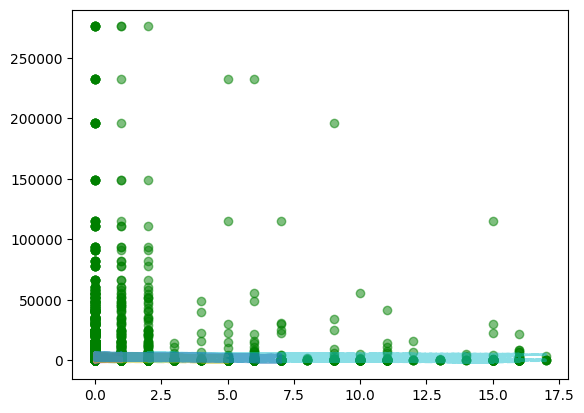

Mean Absolute Error: 3882.509023289404
Mean Squared Error: 218479864.27580622
Root Mean Squared Error: 14781.064382371325


In [29]:
X_test.shape, Y_pred.shape, Y_test.shape

plt.clf()
plt.plot(X_test, Y_test, 'go', label='True data', alpha=0.5)
plt.plot(X_test, Y_pred, '--', label='Predictions', alpha=0.5)
#plt.legend(loc='best')
plt.show()
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

### Polynomial Regressions

In [30]:
degree1=2
degree2=4
polyreg_fit1 = make_pipeline(PolynomialFeatures(degree1), SGDRegressor(alpha = .00001, max_iter=500))
polyreg_fit2 = make_pipeline(PolynomialFeatures(degree2), SGDRegressor(alpha = .00001, max_iter=500))

In [31]:
polyreg_fit1.fit(X_train, Y_train)
polyreg_fit2.fit(X_train, Y_train)

Y_pred1 = polyreg_fit1.predict(X_test)
Y_pred2 = polyreg_fit2.predict(X_test)

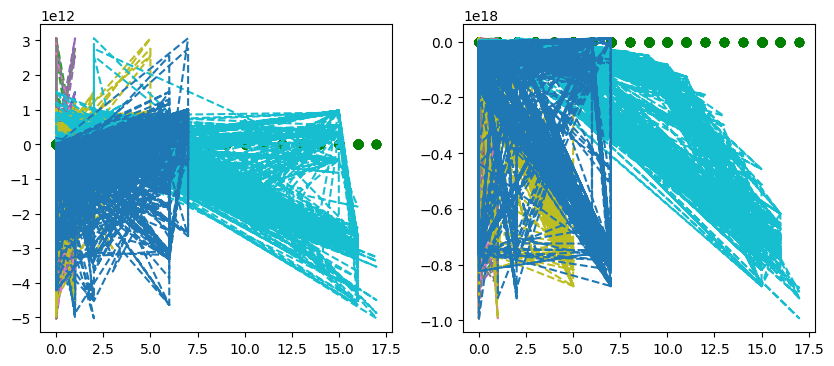

Degree 2:
Mean Absolute Error: 648830823880.939
Mean Squared Error: 1.2422307814963644e+24
Root Mean Squared Error: 1114554072935.1648
Degree 4:
Mean Absolute Error: 1.4083852273027522e+17
Mean Squared Error: 9.079166414941412e+34
Root Mean Squared Error: 3.0131655140302886e+17


In [32]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))


axes[0].plot(X_test, Y_test, 'go', label='True data')
axes[0].plot(X_test, Y_pred1, '--', label='Predictions')



axes[1].plot(X_test, Y_test, 'go', label='True data')
axes[1].plot(X_test, Y_pred2, '--', label='Predictions')

plt.show()

print("Degree 2:")
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred1)))

print("Degree 4:")
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred2))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred2)))

## Neural Network

In [33]:
mlp_X_train = training_data.loc[:, (training_data.columns != 'ESTIMATEDTOTALACRES') & (training_data.columns != 'cluster')]
mlp_Y_train = training_data["cluster"]

mlp_X_test = test_data.loc[:, (test_data.columns != 'ESTIMATEDTOTALACRES') & (test_data.columns != 'cluster')]
mlp_Y_test = test_data["cluster"]

In [34]:
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(mlp_X_train,mlp_Y_train)
y_pred = mlp.predict(mlp_X_test)


In [35]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(mlp_Y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(mlp_Y_test, y_pred, average='weighted'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(mlp_Y_test, y_pred, average='weighted'))

Accuracy: 0.975867269984917
Precision: 0.9523169286278149
Recall: 0.975867269984917


/Users/aej80/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


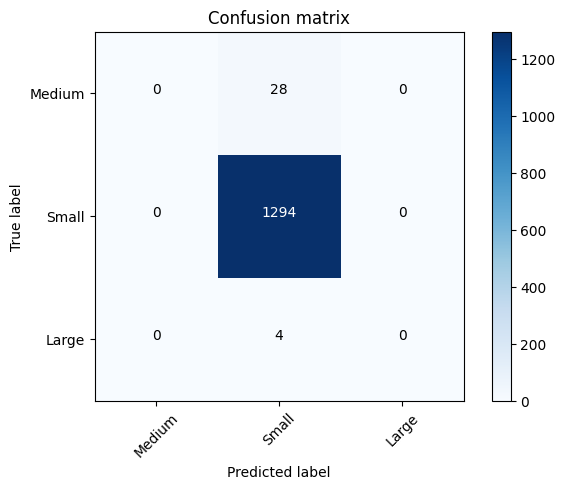

In [36]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm_labels = ["Medium", "Small","Large"]

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm = confusion_matrix(mlp_Y_test, y_pred)

plot_confusion_matrix(cm, cm_labels)  
plt.show()